In [33]:
import numpy as np
import matplotlib.pyplot as plt
from model import get_default_dual_pipeline_model
from matplotlib import ticker

plt.rcParams["font.family"] = "Times New Roman"

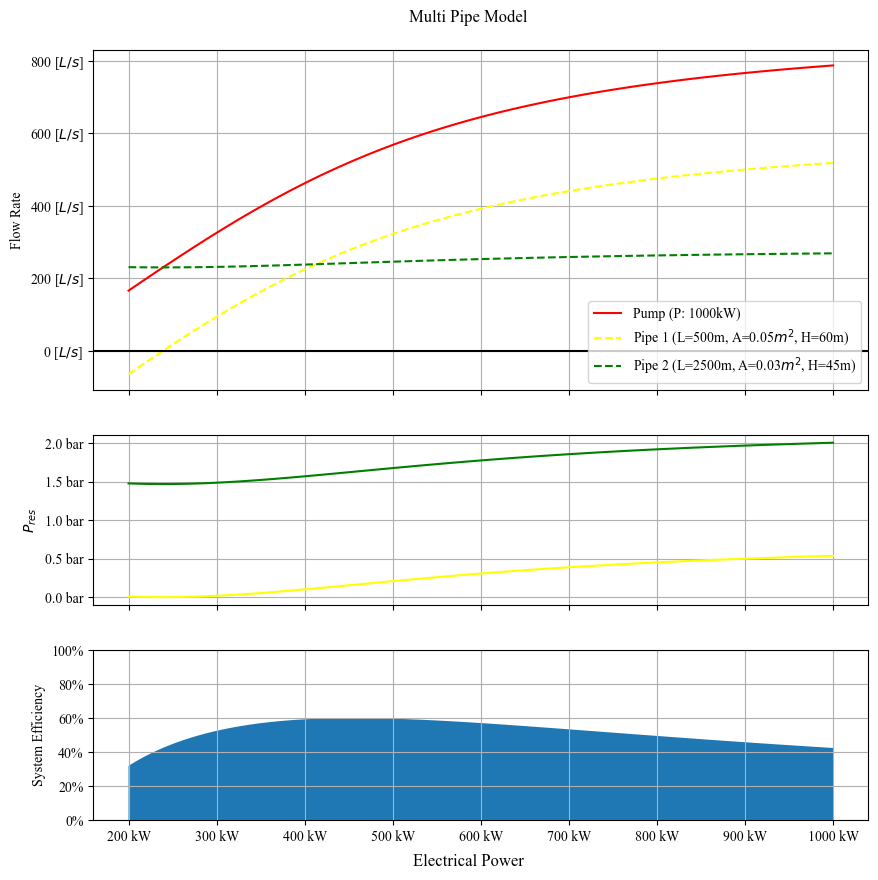

In [37]:
def plot_power_flow_rate_curve():
    model = get_default_dual_pipeline_model()
    
    powers = np.linspace(model.min_power, model.max_power, 100)
    flow_rates = np.zeros_like(powers)
    flow_rates_p1 = np.zeros_like(powers)
    flow_rates_p2 = np.zeros_like(powers)
    res_pressure_p1 = np.zeros_like(powers)
    res_pressure_p2 = np.zeros_like(powers)
    efficiencies = np.zeros_like(powers)
    
    for i, power in enumerate(powers):
        model.power = power
        model.optimize_flow_rates()
        flow_rates[i] = model.flow_rate_pump()
        flow_rates_p1[i] = model.pipelines[0].flow_rate
        flow_rates_p2[i] = model.pipelines[1].flow_rate
        res_pressure_p1[i] = model.pipelines[0].p_res(model.fluid_density)
        res_pressure_p2[i] = model.pipelines[1].p_res(model.fluid_density)
        efficiencies[i] = model.efficiency()
        
    # plot
    fig = plt.figure(figsize=(10, 10))
    gs = fig.add_gridspec(3, hspace=0.2, height_ratios=[2, 1, 1], )
    axs = gs.subplots(sharex=True)
    
    fig.suptitle("Multi Pipe Model", y=0.92)
    fig.supxlabel('Electrical Power', y=0.06)

    axs[0].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f} kW"))

    axs[0].set_ylabel('Flow Rate')
    axs[0].yaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f [$L/s$]"))

    powers = powers/1000

    axs[0].plot(powers, flow_rates*1000, color="red", label=f"Pump (P: {model.power/1000:.0f}kW)")
    axs[0].plot(powers, flow_rates_p1*1000, color="yellow", label="Pipe 1 (L=500m, A=0.05$m^2$, H=60m)", linestyle="--")
    axs[0].plot(powers, flow_rates_p2*1000, color="green", label="Pipe 2 (L=2500m, A=0.03$m^2$, H=45m)", linestyle="--")
    axs[0].legend(loc="lower right")
    axs[0].axhline(0, color="k")
    axs[0].grid()
    
    axs[1].set_ylabel('$P_{res}$')
    axs[1].yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f bar"))
    axs[1].plot(powers, res_pressure_p1/100000, color="yellow", label="Pipe 1 (L=500m, A=0.05$m^2$, H=60m)")
    axs[1].plot(powers, res_pressure_p2/100000, color="green", label="Pipe 2 (L=2500m, A=0.03$m^2$, H=45m)")
    axs[1].grid()

    axs[2].set_ylabel('System Efficiency')
    axs[2].fill_between(powers, efficiencies*100, 0)
    axs[2].yaxis.set_major_formatter(ticker.PercentFormatter())
    axs[2].set_ylim(0, 100)
    axs[2].grid()

    plt.show()
    
plot_power_flow_rate_curve()